In [1]:
!pip install yfinance


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [4]:
p1 = prices1.join(prices2, lsuffix='(BTC)',rsuffix='(ETH)')
p2 = prices3.join(prices4, lsuffix='(USDT)',rsuffix='(BNB)')
data = p1.join(p2, lsuffix='_',rsuffix='_')

In [6]:
data.head()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,,
2020-09-14 00:00:00+00:00,10680.837891,35453581940,377.268860,17536695361,1.001289,49936255991,31.178642,1009392260
2020-09-15 00:00:00+00:00,10796.951172,32509451925,364.839203,16140584321,1.002487,49718173930,27.202391,861821910
2020-09-16 00:00:00+00:00,10974.905273,30769986455,365.812286,16107612177,1.003444,50682289026,27.964594,664539530
2020-09-17 00:00:00+00:00,10948.990234,38151810523,389.019226,19899531080,1.001878,51695424541,26.993130,512578971
2020-09-18 00:00:00+00:00,10944.585938,26341903912,384.364532,14108357740,0.999502,47248825663,27.399481,482149967


In [7]:
data.tail()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,,
2025-09-09 00:00:00+00:00,111530.546875,45984480722,4309.041504,30703320925,1.000065,124541484302,880.015015,1795168603
2025-09-10 00:00:00+00:00,113955.359375,56377473784,4349.145996,39521365146,1.000138,133101421364,893.566589,2868650920
2025-09-11 00:00:00+00:00,115507.539062,45685065332,4461.233398,35959212991,1.000266,121507255807,902.983337,2250551806
2025-09-12 00:00:00+00:00,116101.578125,54785725894,4715.246094,43839753626,1.000618,141338448172,925.030701,2648100391
2025-09-14 00:00:00+00:00,115883.359375,31758684160,4670.974609,30264254464,1.000411,112224354304,942.100342,2810773248


In [8]:
data.shape

(1826, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2020-09-14 00:00:00+00:00 to 2025-09-14 00:00:00+00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close(BTC)    1826 non-null   float64
 1   Volume(BTC)   1826 non-null   int64  
 2   Close(ETH)    1826 non-null   float64
 3   Volume(ETH)   1826 non-null   int64  
 4   Close(USDT)   1826 non-null   float64
 5   Volume(USDT)  1826 non-null   int64  
 6   Close(BNB)    1826 non-null   float64
 7   Volume(BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [10]:
data.isna().sum()

Close(BTC)      0
Volume(BTC)     0
Close(ETH)      0
Volume(ETH)     0
Close(USDT)     0
Volume(USDT)    0
Close(BNB)      0
Volume(BNB)     0
dtype: int64

In [11]:
data.describe()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
count,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03
mean,49287.016253,3.571240e+10,2349.389664,1.841467e+10,1.000188,6.657015e+10,400.054508,1.659100e+09
std,28068.215207,2.157217e+10,982.291597,1.191263e+10,0.000737,4.141624e+10,197.419602,1.348092e+09
min,10246.186523,5.331173e+09,321.116302,2.081626e+09,0.995872,9.989859e+09,22.856977,2.038465e+08
25%,27046.270020,2.136577e+10,1648.508423,1.023429e+10,0.999922,3.915474e+10,264.886078,6.998265e+08
50%,42410.185547,3.115021e+10,2258.928711,1.580556e+10,1.000157,5.705998e+10,347.627182,1.488015e+09
75%,63836.208984,4.432045e+10,3106.030151,2.290320e+10,1.000430,8.152608e+10,579.669510,2.060598e+09
max,123344.062500,3.509679e+11,4831.348633,9.245355e+10,1.011530,3.006686e+11,942.100342,1.798295e+10


Exploratory Data Analysis

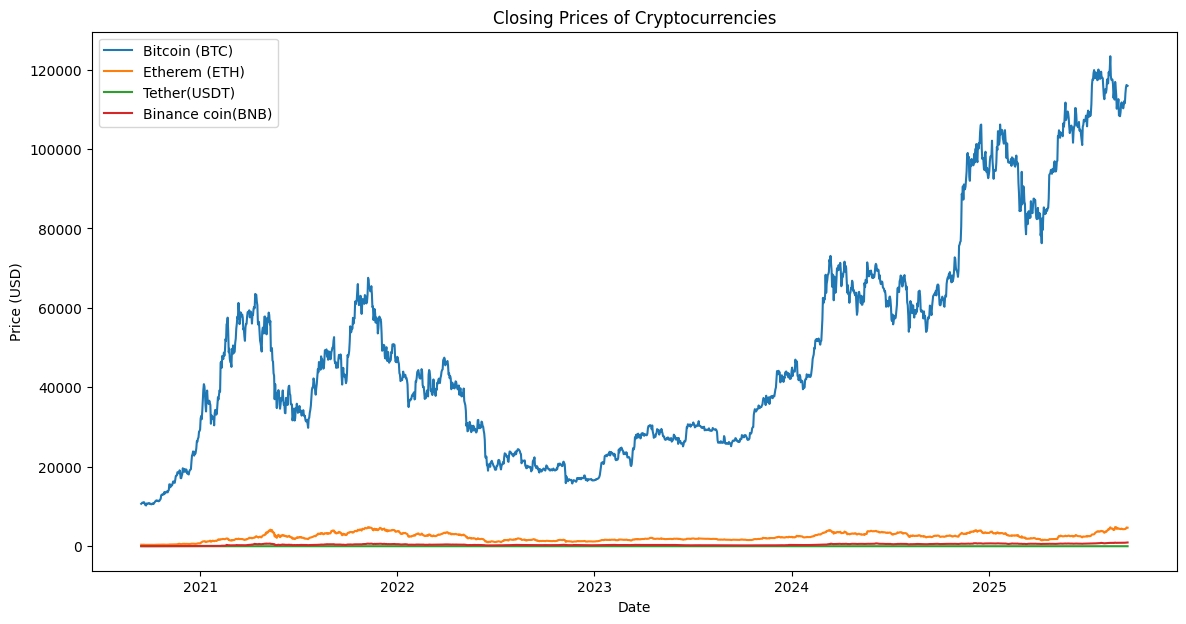

In [13]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close(BTC)'], label = 'Bitcoin (BTC)')
plt.plot(data.index, data['Close(ETH)'], label = 'Etherem (ETH)')
plt.plot(data.index, data['Close(USDT)'], label = 'Tether(USDT)')
plt.plot(data.index, data['Close(BNB)'], label = 'Binance coin(BNB)')

plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

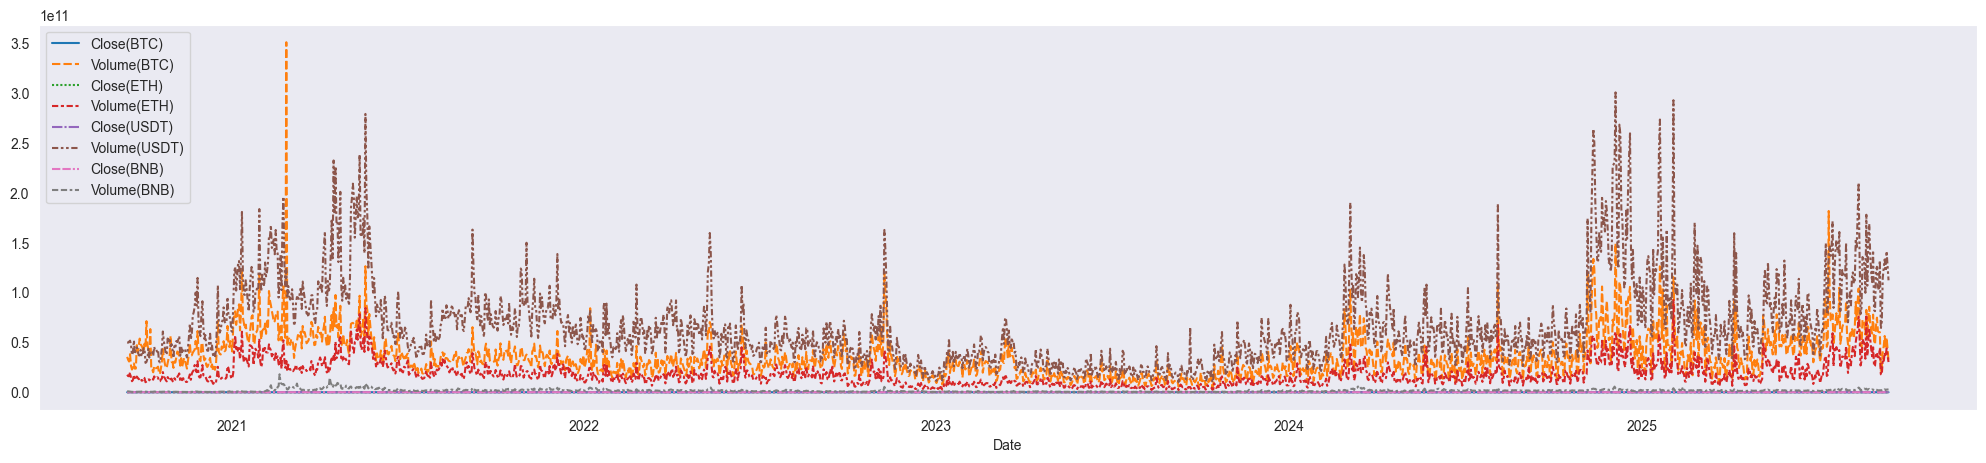

In [14]:
plt.figure(figsize=(25,5))
sns.set_style('dark')
sns.lineplot(data=data)

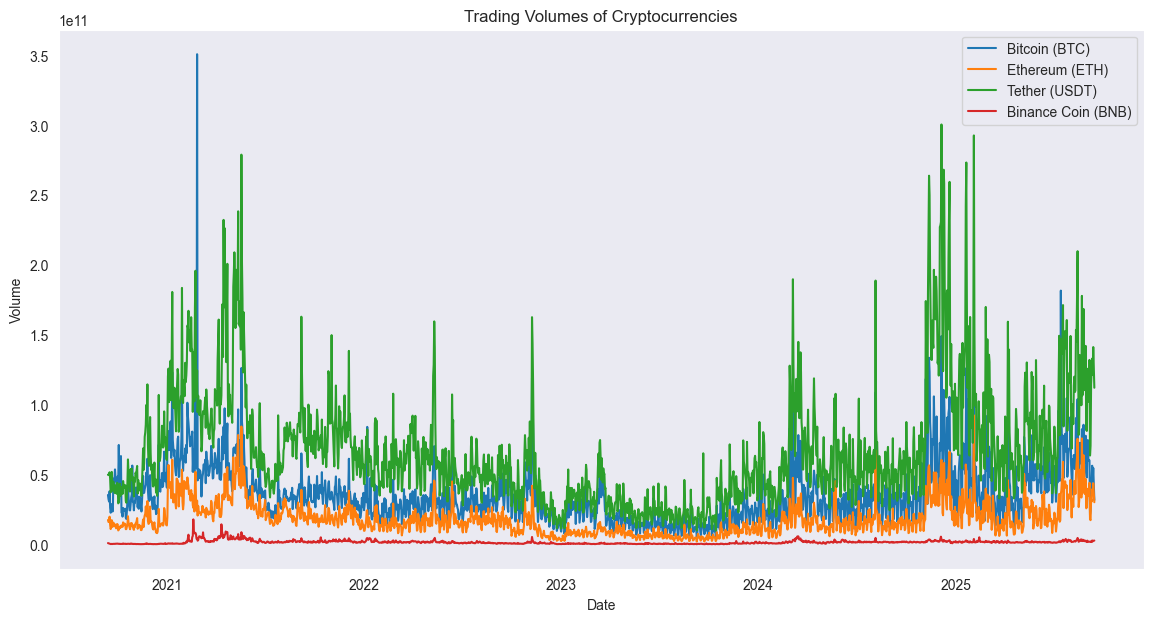

In [16]:
# Visualize trading volume
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume(BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume(ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume(USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume(BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


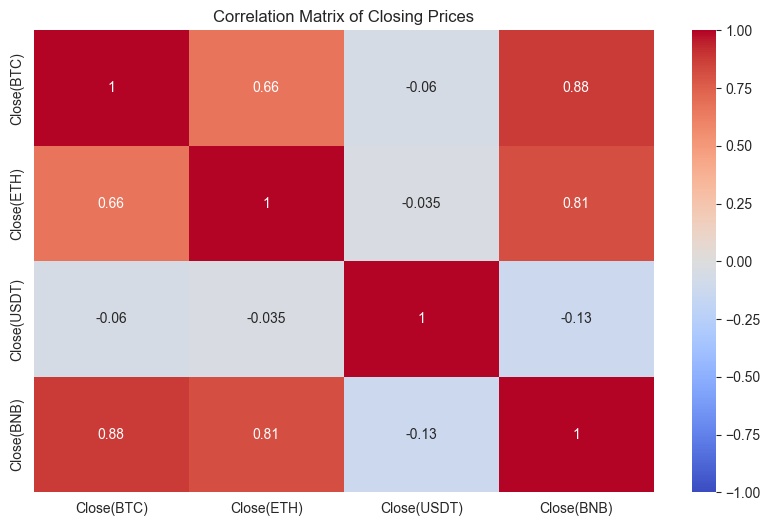

In [18]:
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close(BTC)', 'Close(ETH)', 'Close(USDT)', 'Close(BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


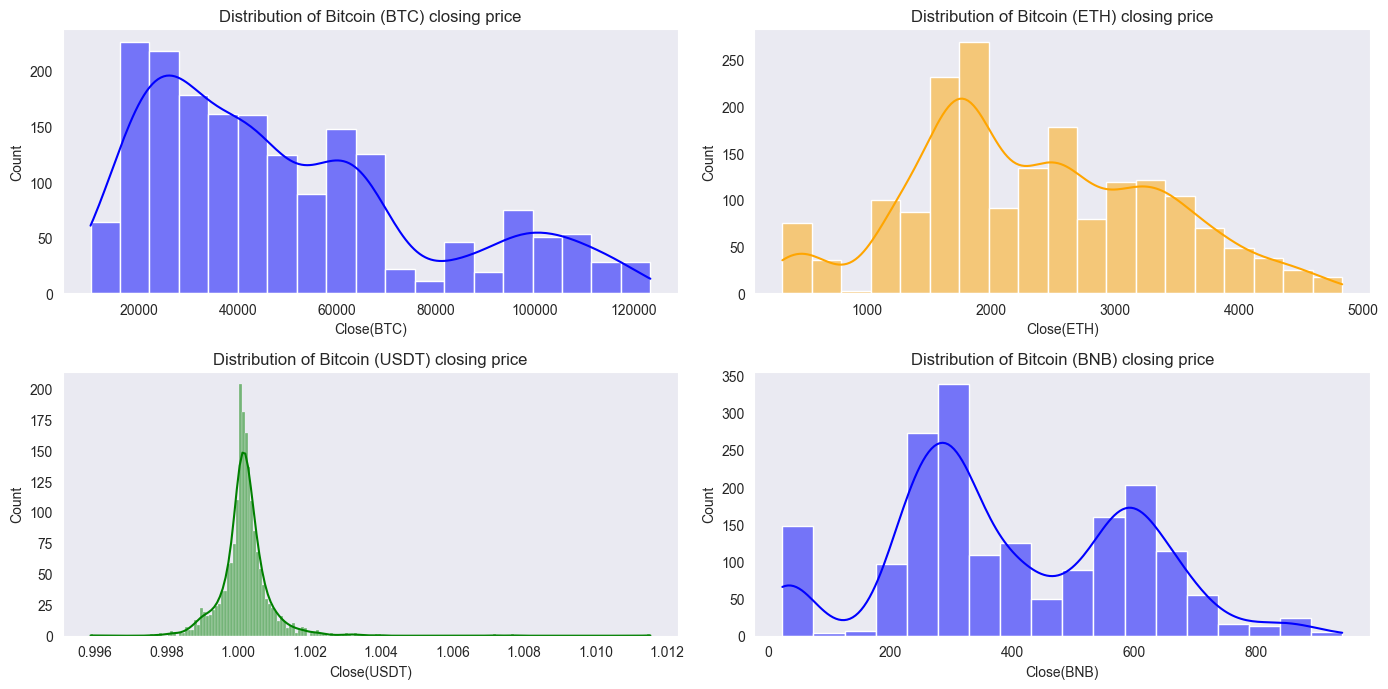

In [19]:
# plot the graph for distributing of closing prices for each cryptocurrenct
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.histplot(data['Close(BTC)'],kde=True,color='Blue')
plt.title('Distribution of Bitcoin (BTC) closing price')

plt.subplot(2,2,2)
sns.histplot(data['Close(ETH)'],kde=True,color='orange')
plt.title('Distribution of Bitcoin (ETH) closing price')

plt.subplot(2,2,3)
sns.histplot(data['Close(USDT)'],kde=True,color='green')
plt.title('Distribution of Bitcoin (USDT) closing price')

plt.subplot(2,2,4)
sns.histplot(data['Close(BNB)'],kde=True,color='Blue')
plt.title('Distribution of Bitcoin (BNB) closing price')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Close(BTC)'}>,
        <Axes: title={'center': 'Volume(BTC)'}>,
        <Axes: title={'center': 'Close(ETH)'}>,
        <Axes: title={'center': 'Volume(ETH)'}>],
       [<Axes: title={'center': 'Close(USDT)'}>,
        <Axes: title={'center': 'Volume(USDT)'}>,
        <Axes: title={'center': 'Close(BNB)'}>,
        <Axes: title={'center': 'Volume(BNB)'}>]], dtype=object)

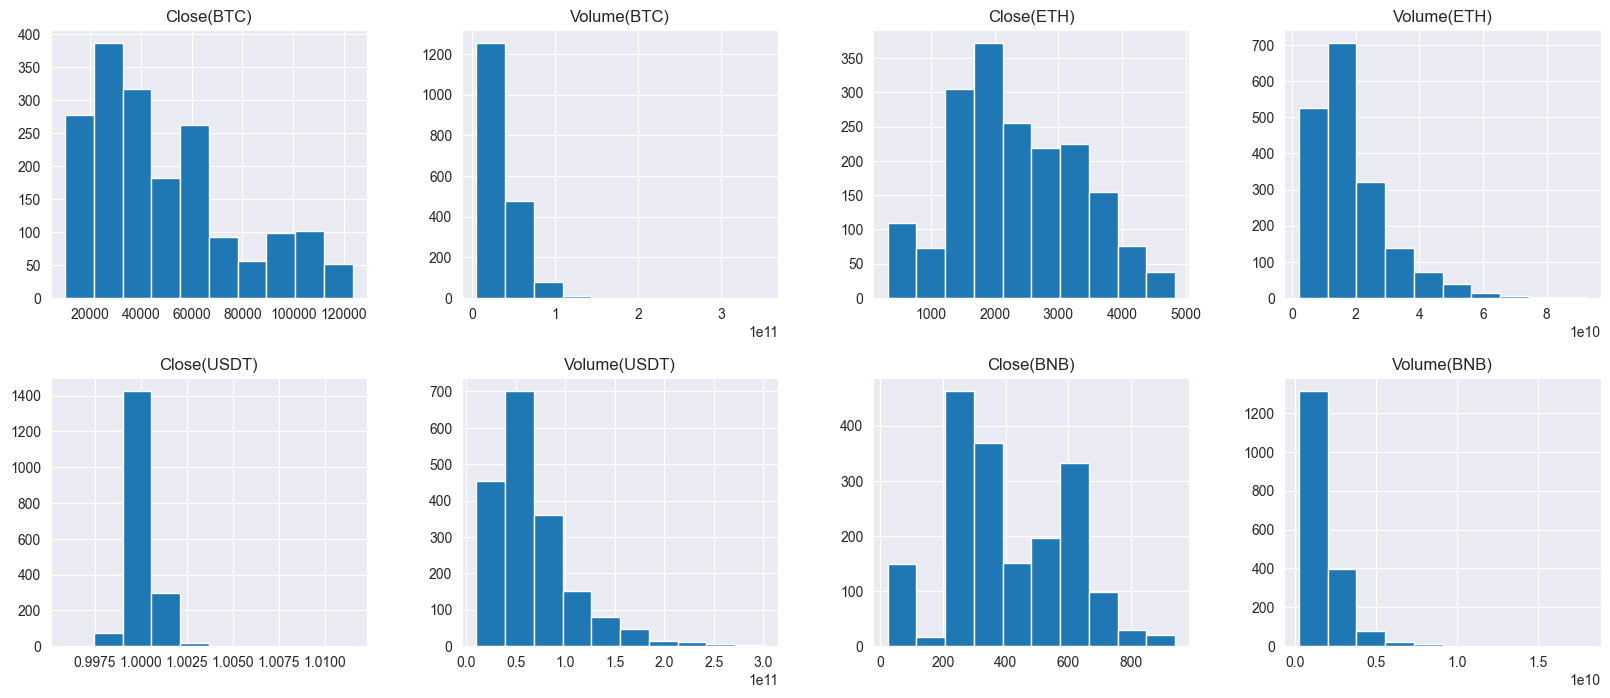

In [20]:
data.hist(figsize=(20,8),layout=(2,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

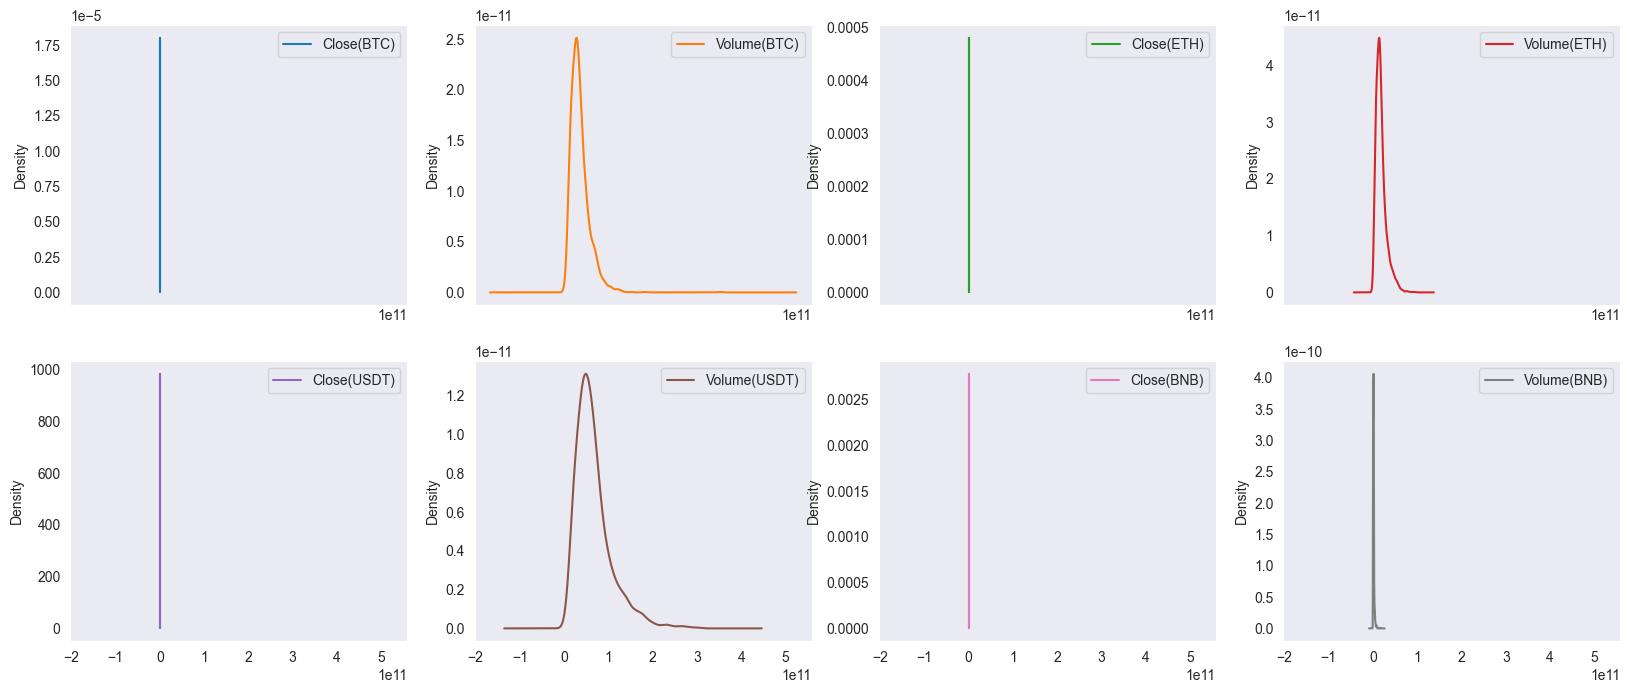

In [21]:
data.plot(kind="kde",subplots=True,layout=(2,4),figsize=(20,8))

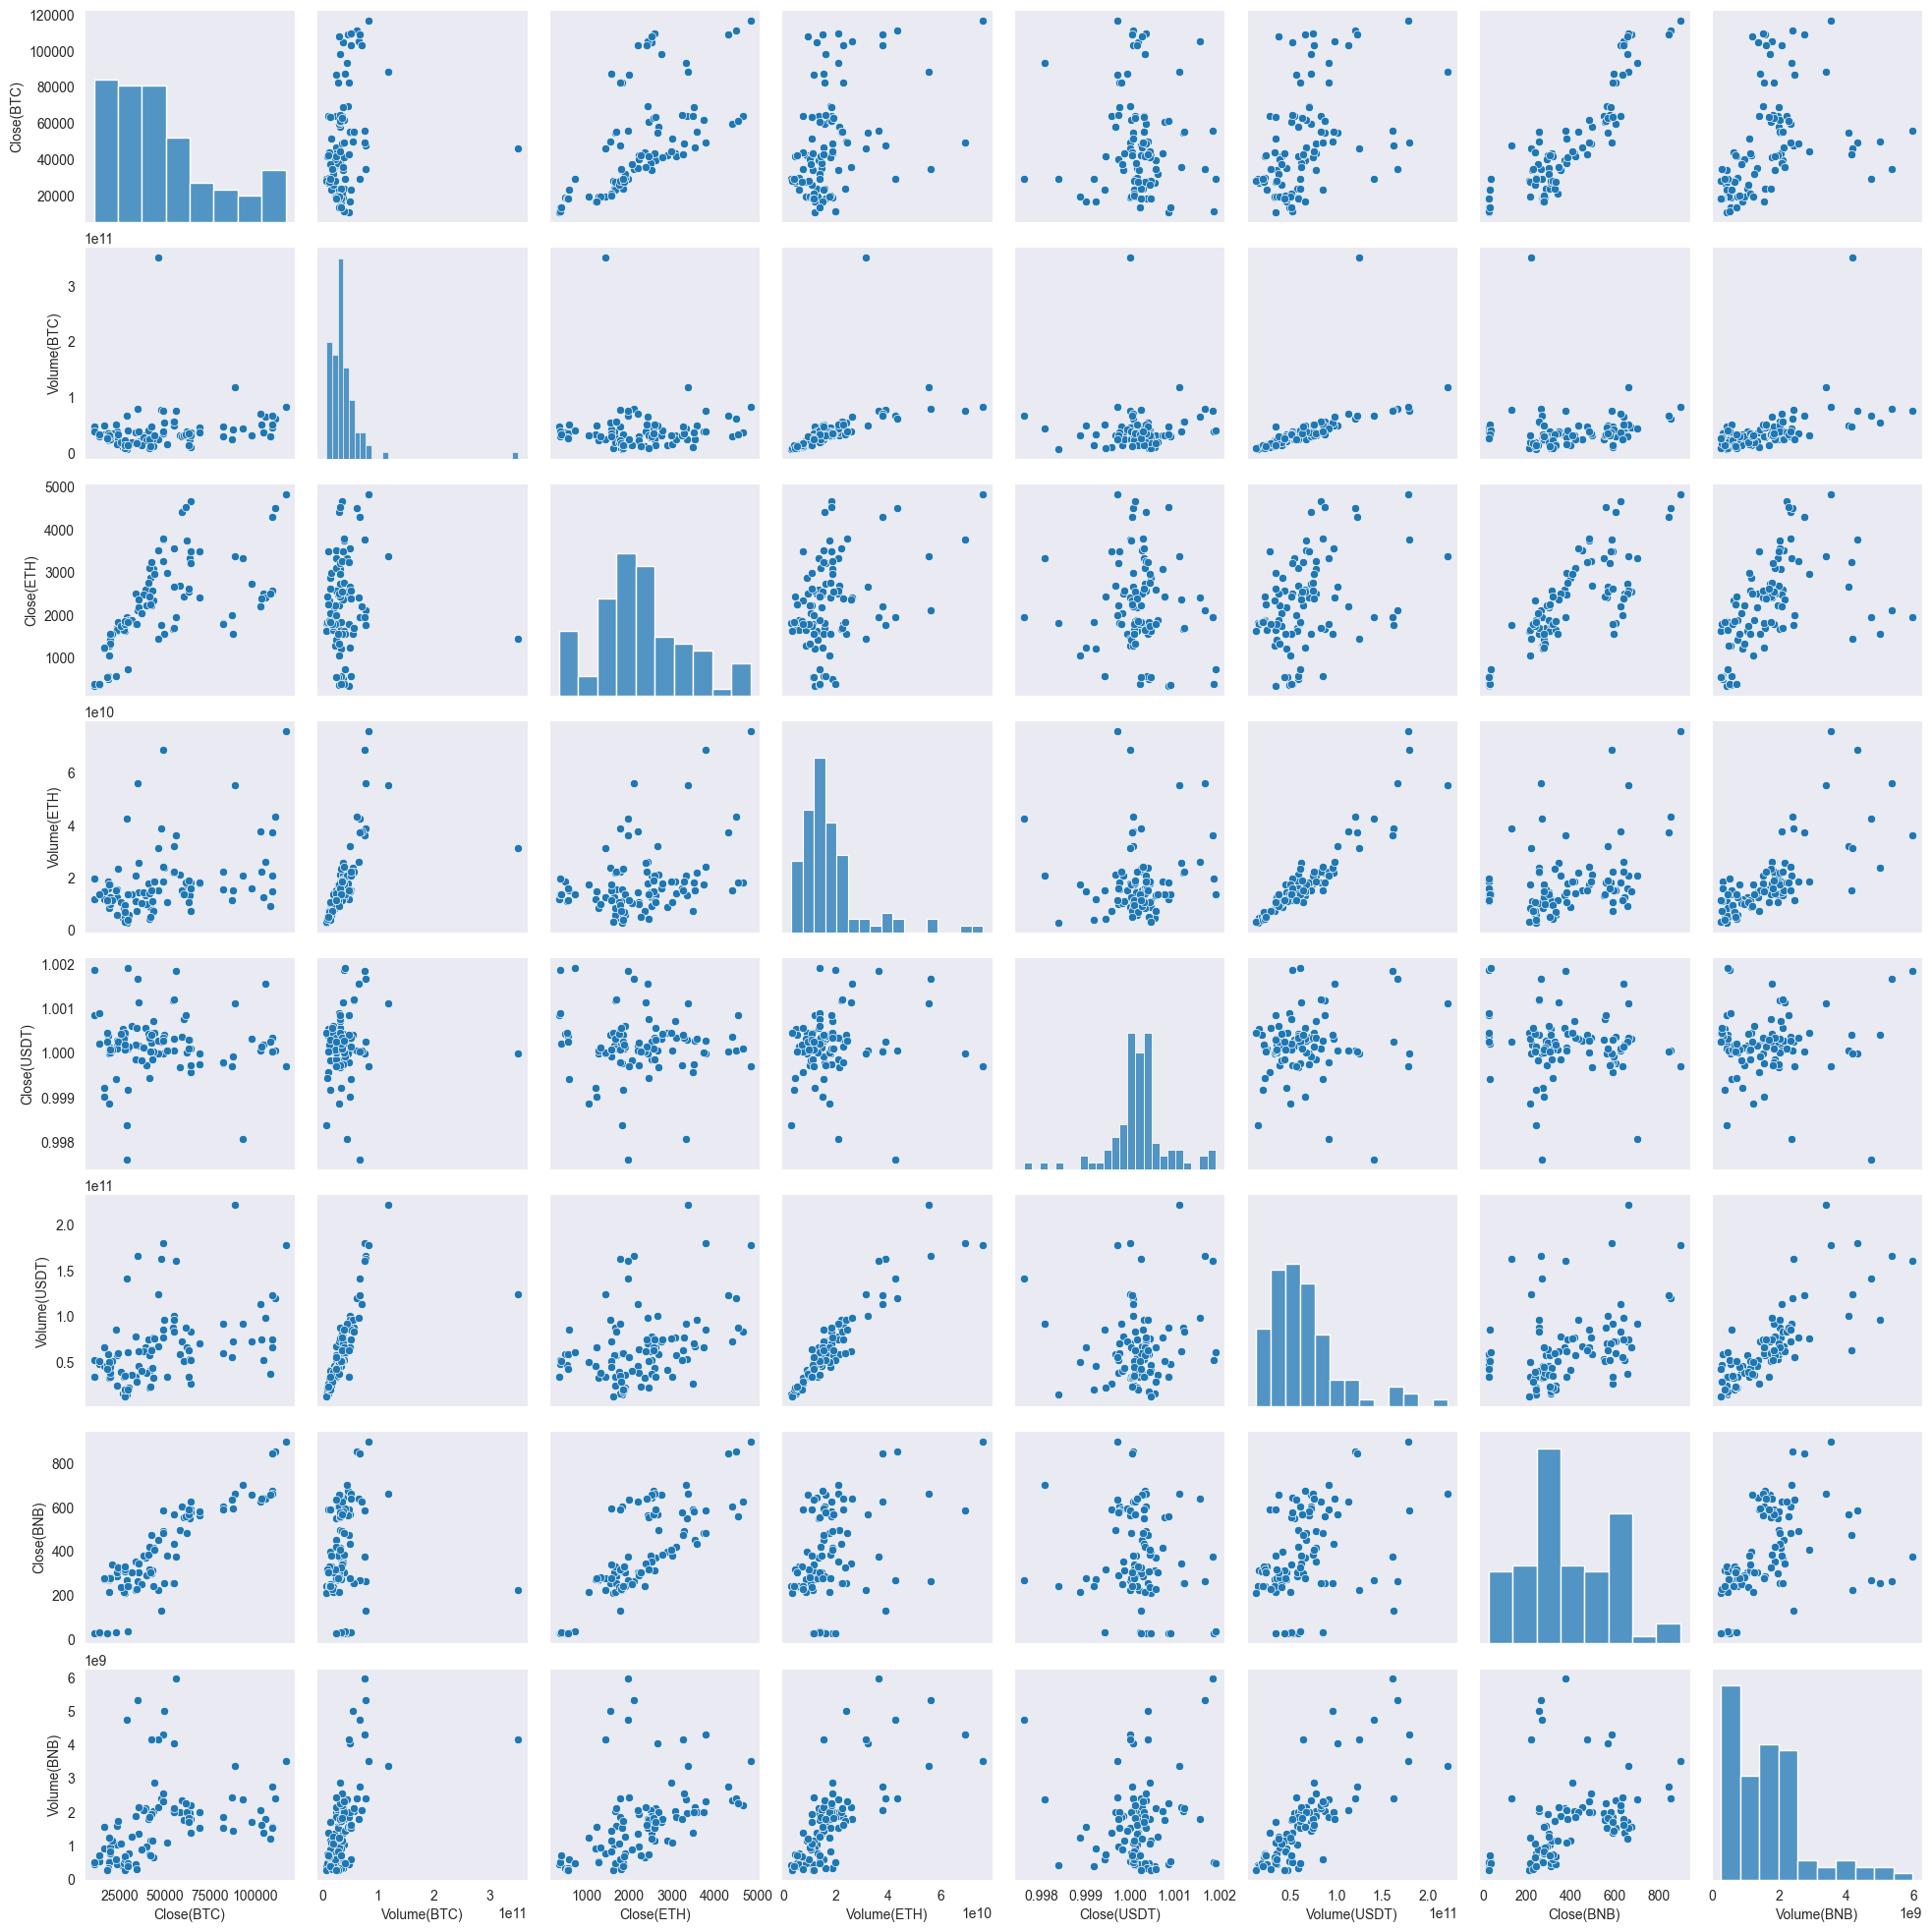

In [22]:
sns.pairplot(data.sample(n=100))

Data Preprocessing

In [27]:
x = data.drop(columns=['Close(BTC)'], axis=1)
y = data.loc[:, 'Close(BTC)']

In [28]:
x.head()

,Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,
2020-09-14 00:00:00+00:00,35453581940,377.268860,17536695361,1.001289,49936255991,31.178642,1009392260
2020-09-15 00:00:00+00:00,32509451925,364.839203,16140584321,1.002487,49718173930,27.202391,861821910
2020-09-16 00:00:00+00:00,30769986455,365.812286,16107612177,1.003444,50682289026,27.964594,664539530
2020-09-17 00:00:00+00:00,38151810523,389.019226,19899531080,1.001878,51695424541,26.993130,512578971
2020-09-18 00:00:00+00:00,26341903912,384.364532,14108357740,0.999502,47248825663,27.399481,482149967


In [29]:
x.tail()

,Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,
2025-09-09 00:00:00+00:00,45984480722,4309.041504,30703320925,1.000065,124541484302,880.015015,1795168603
2025-09-10 00:00:00+00:00,56377473784,4349.145996,39521365146,1.000138,133101421364,893.566589,2868650920
2025-09-11 00:00:00+00:00,45685065332,4461.233398,35959212991,1.000266,121507255807,902.983337,2250551806
2025-09-12 00:00:00+00:00,54785725894,4715.246094,43839753626,1.000618,141338448172,925.030701,2648100391
2025-09-14 00:00:00+00:00,31758684160,4670.974609,30264254464,1.000411,112224354304,942.100342,2810773248


In [30]:
y.head()

Date
2020-09-14 00:00:00+00:00    10680.837891
2020-09-15 00:00:00+00:00    10796.951172
2020-09-16 00:00:00+00:00    10974.905273
2020-09-17 00:00:00+00:00    10948.990234
2020-09-18 00:00:00+00:00    10944.585938
Name: Close(BTC), dtype: float64

In [31]:
y.tail()

Date
2025-09-09 00:00:00+00:00    111530.546875
2025-09-10 00:00:00+00:00    113955.359375
2025-09-11 00:00:00+00:00    115507.539062
2025-09-12 00:00:00+00:00    116101.578125
2025-09-14 00:00:00+00:00    115883.359375
Name: Close(BTC), dtype: float64

In [32]:
# split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

In [33]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (365, 7)
x_test shape: (1461, 7)
y_train shape: (365,)
y_test shape: (1461,)


In [35]:
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features
from sklearn.feature_selection import SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.

fs = SelectKBest(k=4)
X_train = fs.fit_transform(x_train, y_train)
X_test = fs.transform(x_test)

c:\Users\Tharuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [36]:
print(np.isnan(x_train).sum())   # how many NaN
print(np.isinf(x_train).sum())   # how many Inf


Volume(BTC)     0
Close(ETH)      0
Volume(ETH)     0
Close(USDT)     0
Volume(USDT)    0
Close(BNB)      0
Volume(BNB)     0
dtype: int64
Volume(BTC)     0
Close(ETH)      0
Volume(ETH)     0
Close(USDT)     0
Volume(USDT)    0
Close(BNB)      0
Volume(BNB)     0
dtype: int64


In [37]:
x_train

,Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,
2024-05-14 00:00:00+00:00,28186271527,2881.157959,12444516140,0.999592,57380795961,566.707031,1944063031
2023-07-18 00:00:00+00:00,13138897269,1897.599243,5814708445,1.000158,22117323145,240.264938,751858394
2024-09-21 00:00:00+00:00,14408616220,2615.857178,10797825021,1.000310,33954200576,589.037964,1694887390
2021-12-13 00:00:00+00:00,32166727776,3784.226807,23999841386,1.000131,66458705759,521.011597,1900967743
2022-04-21 00:00:00+00:00,35372786395,2987.480713,20783591093,1.000157,77014328066,405.021454,2190281843
...,...,...,...,...,...,...,...
2022-12-28 00:00:00+00:00,17005713920,1189.986084,4991669631,0.999686,21161758512,244.141922,414698978
2024-01-13 00:00:00+00:00,20601860469,2576.597900,12250316867,0.999976,38741665180,302.227295,816347256
2025-03-25 00:00:00+00:00,30005840049,2067.764160,11735658914,1.000188,58456757340,629.942871,2238118522


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 138649612.5285
R-squared: 0.8244
Mean Absolute Error (MAE): 9431.3563

----- Ridge Regression -----
Mean Squared Error (MSE): 150200652.4665
R-squared: 0.8098
Mean Absolute Error (MAE): 9740.1893

----- Lasso Regression -----
Mean Squared Error (MSE): 138715264.3962
R-squared: 0.8243
Mean Absolute Error (MAE): 9434.7048

----- ElasticNet Regressor -----
Mean Squared Error (MSE): 599535613.2307
R-squared: 0.2408
Mean Absolute Error (MAE): 19447.5245

----- Support Vector Regressor -----
Mean Squared Error (MSE): 886321094.2846
R-squared: -0.1224
Mean Absolute Error (MAE): 22359.1748

----- DecisionTree Regressor -----
Mean Squared Error (MSE): 58030459.6964
R-squared: 0.9265
Mean Absolute Error (MAE): 4147.7878

----- RandomForest Regressor -----
Mean Squared Error (MSE): 40166560.5545
R-squared: 0.9491
Mean Absolute Error (MAE): 3645.8322

----- GradientBoosting Regressor -----
Mean Squared Error (MSE): 36984734.1830
R-squared: 0.

c:\Users\Tharuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


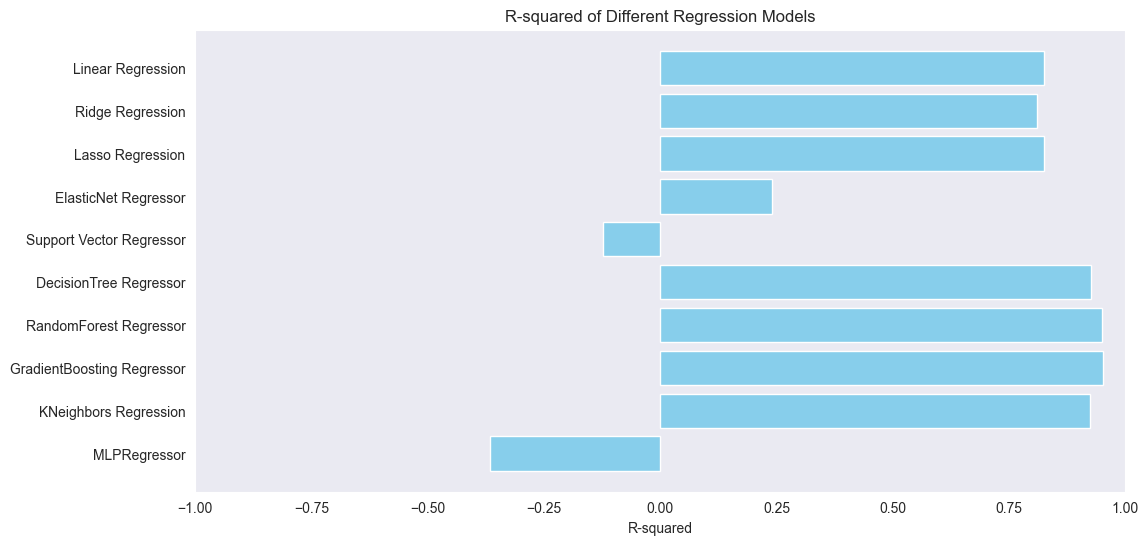

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regressor': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'RandomForest Regressor': RandomForestRegressor(n_estimators=100),
    'GradientBoosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'KNeighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'MLPRegressor': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
}

# Store results
results = {'Model': [], 'MSE': [], 'R-squared': [], 'MAE': []}

# Train and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)
    results['MAE'].append(mae)

    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}\n")

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


Save the model

In [ ]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

x,y = make_regression(n_samples=100, n_features=10, noise= 0.1, random_state=0)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100,random_state=0)

# training 
model_rf.fit(x_train,y_train)

#save model to file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename,'wb'))

# Save scaler to a file
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

# load model from pickle file
loaded_file = pickle.load(open(filename,'rb'))
y_pred = loaded_file.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)


ValueError: Found input variables with inconsistent numbers of samples: [365, 1461]